## Notebook for comparing tool sandbox runs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib

import polars as pl
import seaborn as sns

from tool_sandbox.analysis.analysis import extract_aggregated_stats, extract_meta_stats
from tool_sandbox.analysis.data_loading import (
    extract_scenario_results,
    load_result_summary,
)

In [3]:
name_to_results_summary_path = {
    "baseline": pathlib.Path(
        "/Users/andrewrevell/Projects/767/ToolSandbox/data/agent_gpt-4o-mini_user_gpt-4o-mini_06_04_2025_14_39_33_without_domain_all/result_summary.json"
    ),
    "with_some_change": pathlib.Path(
        "/Users/andrewrevell/Projects/767/ToolSandbox/data/agent_gpt-4o-mini_user_gpt-4o-mini_06_04_2025_16_34_31_with_domain_all/result_summary.json"
    ),
}

name_to_results = {
    name: load_result_summary(results_path)
    for name, results_path in name_to_results_summary_path.items()
}
print("Loaded results for these experiments:\n", sorted(name_to_results.keys()))

Loaded results for these experiments:
 ['baseline', 'with_some_change']


### Extract per scenario results

In [4]:
name_to_scenario_results = {
    name: extract_scenario_results(results) for name, results in name_to_results.items()
}

# Add a new column for the experiment name and then concatenate the data frames. This
# makes it easy to compare the experiments as tables or in plots. Note that we use
# `select` instead of `with_new_columns` since we want to ensure that the experiment
# name becomes the first column.
all_experiments_scenario_results_all_columns_df = pl.concat(
    (
        df.select([pl.lit(name).alias("experiment"), pl.all()])
        for name, df in name_to_scenario_results.items()
    ),
    how="vertical_relaxed",  # < to handle mix of null and string values for exceptions
)
all_experiments_scenario_results_all_columns_df

experiment,name,categories,traceback,exception_type,milestone_similarity,minefield_similarity,similarity,turn_count,milestone_mapping,minefield_mapping
str,str,list[str],str,str,f64,f64,f64,i64,struct[6],struct[1]
"""baseline""","""turn_on_location_low_battery_m…","[""STATE_DEPENDENCY"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.822698,0.0,0.822698,11,"{[23.0, 1.0],[25.0, 1.0],[26.0, 0.468093],null,null,null}",{null}
"""baseline""","""search_reminder_with_recency_u…","[""INSUFFICIENT_INFORMATION"", ""NO_DISTRACTION_TOOLS""]",null,null,1.0,1.0,0.0,11,"{null,null,null,null,null,null}","{[19.0, 1.0]}"
"""baseline""","""search_reminder_with_creation_…","[""CANONICALIZATION"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.933673,0.0,0.933673,15,"{[17.0, 1.0],[21.0, 1.0],[26.0, 0.801018],null,null,null}",{null}
"""baseline""","""add_reminder_content_and_weekd…","[""CANONICALIZATION"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.0,0.0,0.0,7,"{[15.0, 0.0],[15.0, 0.0],null,null,null,null}",{null}
"""baseline""","""send_message_with_contact_cont…","[""STATE_DEPENDENCY"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.953151,0.0,0.953151,19,"{[41.0, 1.0],[33.0, 1.0],[45.0, 1.0],[46.0, 0.812605],null,null}",{null}
…,…,…,…,…,…,…,…,…,…,…
"""with_some_change""","""turn_on_wifi_low_battery_mode""","[""STATE_DEPENDENCY"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.871125,0.0,0.871125,11,"{[24.0, 1.0],[26.0, 1.0],[27.0, 0.613375],null,null,null}",{null}
"""with_some_change""","""search_message_with_recency_la…","[""MULTIPLE_TOOL_CALL"", ""MULTIPLE_USER_TURN"", ""NO_DISTRACTION_TOOLS""]",null,null,0.923345,0.0,0.923345,17,"{[34.0, 1.0],[39.0, 0.846689],null,null,null,null}",{null}
"""with_some_change""","""add_reminder_content_and_week_…","[""CANONICALIZATION"", ""MULTIPLE_TOOL_CALL"", … ""NO_DISTRACTION_TOOLS""]",null,null,0.5,0.0,0.5,9,"{[20.0, 1.0],[20.0, 0.0],null,null,null,null}",{null}


In [5]:
# We exclude the categories, milestone and minefield mappings as they cannot be
# converted to a pandas dataframe.
all_experiments_scenario_results_df = (
    all_experiments_scenario_results_all_columns_df.select(
        pl.exclude(
            ["categories", "traceback", "milestone_mapping", "minefield_mapping"]
        )
    )
)

<Axes: xlabel='turn_count', ylabel='Count'>

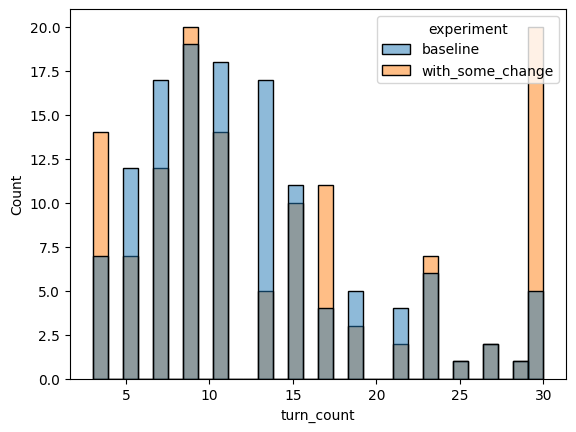

In [6]:
sns.histplot(
    all_experiments_scenario_results_df,
    x="turn_count",
    hue="experiment",
    bins=30,
)

<Axes: xlabel='similarity', ylabel='Count'>

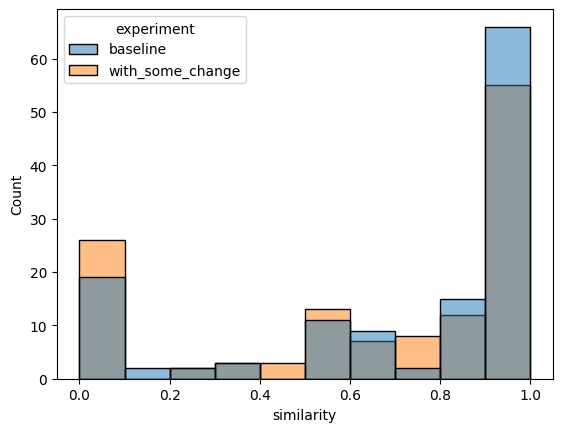

In [7]:
# We exclude the categories and milestone mappings as they cannot be converted to a
# pandas dataframe.
sns.histplot(
    all_experiments_scenario_results_df,
    x="similarity",
    hue="experiment",
)

### Extract high-level metadata from the scenario results

In [8]:
name_to_meta_stats = {
    name: extract_meta_stats(scenarios_df)
    for name, scenarios_df in name_to_scenario_results.items()
}

# Add a new column for the experiment name and then concatenate the data frames. This
# makes it easy to compare the experiments as tables or in plots. Note that we use
# `select` instead of `with_new_columns` since we want to ensure that the experiment
# name becomes the first column.
all_experiments_meta_stats_df = pl.concat(
    df.select([pl.lit(name).alias("experiment"), pl.all()])
    for name, df in name_to_meta_stats.items()
)
all_experiments_meta_stats_df

experiment,num_scenarios,num_exceptions,total_num_turn_counts,normalized_total_num_turn_counts
str,i64,i64,i64,f64
"""baseline""",129,1,1598,12.387597
"""with_some_change""",129,7,1865,14.457364


In [ ]:
# Also print the table as markdown so that it can be copied into a Github comment.
with pl.Config() as cfg:
    cfg.set_tbl_formatting("ASCII_MARKDOWN")
    print(all_experiments_meta_stats_df)

### Extract aggregated statistics per scenario category

In [9]:
name_to_agg_results = {
    name: extract_aggregated_stats(results) for name, results in name_to_results.items()
}

# Add a new column for the experiment name and then concatenate the data frames. This
# makes it easy to create a bar chart comparing the individual categories for each
# experiment.
all_experiments_df = pl.concat(
    df.with_columns(experiment=pl.lit(name)) for name, df in name_to_agg_results.items()
)

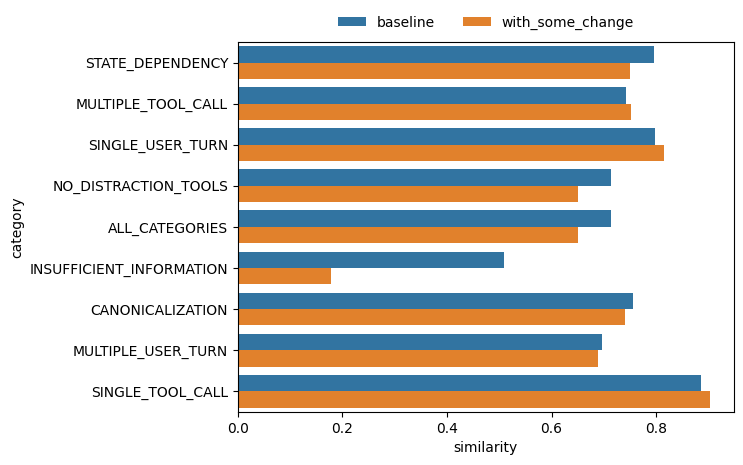

In [10]:
ax = sns.barplot(all_experiments_df, x="similarity", y="category", hue="experiment")
# Move the legend above the plot.
sns.move_legend(
    ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False
)